# Boosting

**`Boosting`** es una clase de algoritmos de aprendizaje automático de **"conjunto"** que implica combinar las predicciones de muchos **"aprendices débiles"**. En esta clase de algoritmos los modelos se agregan secuencialmente y los modelos posteriores en la secuencia corrigen las predicciones realizadas por los modelos anteriores en la secuencia.

Un **"aprendiz débil"** es un modelo que es muy simple pero que puede dar buenos resultados.

## AdaBoost (Adaptive Boosting)

**`AdaBoost` es un método de aprendizaje supervisado** que se inventó inicialmente para **aumentar la eficiencia de los clasificadores binarios**. **`AdaBoost`** utiliza un enfoque iterativo para aprender de los errores de los clasificadores débiles y convertirlos en clasificadores fuertes.

El algoritmo **`AdaBoost`** implica el uso de árboles de decisión (**`DecisionTrees`**) muy cortos (de profundidad 1, también son conocidos como **Stumps**) como aprendices débiles que se agregan secuencialmente al conjunto. Cada modelo posterior intenta corregir las predicciones realizadas por el modelo anterior en la secuencia. Esto se logra al examinar el conjunto de datos de entrenamiento para centrarse más en las instancias de entrenamiento en los que los modelos anteriores cometieron errores de predicción.

El algoritmo de entrenamiento implica **comenzar con un árbol de decisión**, encontrar aquellas **instancias en el conjunto de datos de entrenamiento que se clasificaron incorrectamente** y **agregar más peso a esas instancias**. Se entrena otro árbol con los mismos datos, aunque ahora ponderado por los errores de clasificación. Este proceso se repite tantas veces como el usuario quiera.


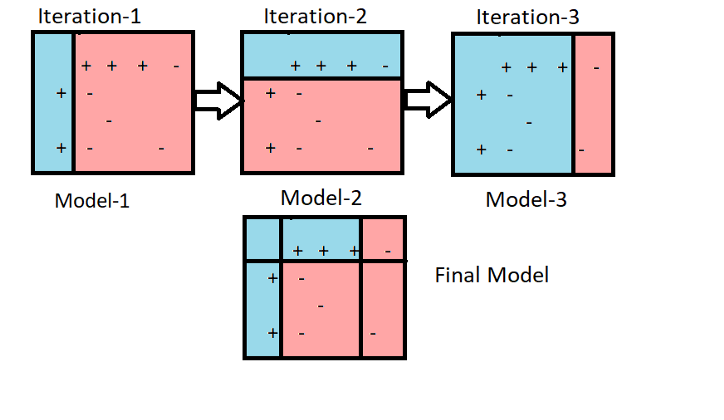

_**Documentacion**: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html_

Aunque en la teoria se habla de **`DecisionTrees`**, la función de **`Sklearn`** nos permite usar diferentes modelos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
iris = datasets.load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]

# En esta ocasión vamos a quedarnos con las primeras 2 clases y solo las primeras 2 columnas

### Preprocesamiento

In [ ]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

### Train, Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

### Modelo

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model = AdaBoostClassifier(n_estimators = 50)
model.fit(X_train, y_train)

# Por defecto usa DecisionTreeClassifier()

In [ ]:
# AdaBoost usando como base LogisticRegression()

#model = AdaBoostClassifier(base_estimator = LogisticRegression(), n_estimators = 50)
#model.fit(X_train, y_train)

# Por defecto usa DecisionTreeClassifier()

### Predicciones

In [ ]:
yhat = model.predict(X_test)

yhat

In [ ]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

### Confusion Matrix

In [ ]:
confusion_matrix(y_test, yhat, labels = [0, 1, 2])

### Atributos y Métodos

In [ ]:
# .predict_proba()


np.round(model.predict_proba(X_test), 4)


# Redondeado a 4 decimales para quitar la notación científica

In [ ]:
# .base_estimator_ es el modelo base sobre el cual se va adaptando.

model.base_estimator_

In [ ]:
# .estimators_ lista de modelos generados

model.estimators_

In [ ]:
# .estimator_errors_ retorna el error de los modelos generados

np.round(model.estimator_errors_, 3)

# Redondeado a 3 decimales para quitar la notación científica

In [ ]:
plt.plot(model.estimator_errors_, marker = "o", color = "red", linestyle = "")
plt.show()

In [ ]:
# .feature_importances_ retorna la importancia de cada columna

model.feature_importances_

In [ ]:
# .decision_function() retorna la "transformación" de una instancia 
# Esta "tranasformacion" es un array de n elementos (uno para cada clase)
# La suma de cada array debe dar 0, o muy cerca de 0
# Es muy parecido a .predict_proba()

# Cuando la clasificación es binaria retorna un unico valor
# De clasifica la instancia dependiendo de que tan cerca este del 0 o el 1.

model.decision_function(X_test)

In [ ]:
plt.figure(figsize = (12, 8))

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Creación de la Malla
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Calculo de los puntos en Z
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


cs = plt.contourf(xx, yy, Z, cmap = "Blues")
plt.axis("tight")

# Plot de los puntos
for i, n, c in zip(range(2), "AB", "br"):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1],
                c = c, cmap = plt.cm.Paired,
                s = 20, edgecolor = "k",
                label = "Class %s" % n)
    
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.show()

In [ ]:
################################################################################################################################

### Ejercicio 1:
- Utiliza el dataset de **`titanic_preprocesamiento.csv`** para practicar este modelo.
    - Prueba con diferentes modelos de clasificación y diferente número de estimadores.